In [5]:
import numpy as np
v = np.array([1,1])
print(v)

[1 1]


In [4]:
m = np.array([[1,1],[1,2]])
print(m)

[[1 1]
 [1 2]]


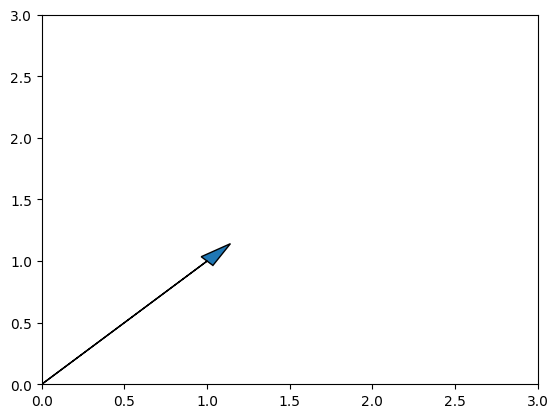

In [2]:
import matplotlib.pyplot as plt
plt.xlim(0, 3)
plt.ylim(0, 3)
plt.arrow(0,0,v[0],v[1],head_width=0.1, head_length=0.2)

In [9]:
np.sqrt(np.sum(v**2))

np.float64(1.4142135623730951)

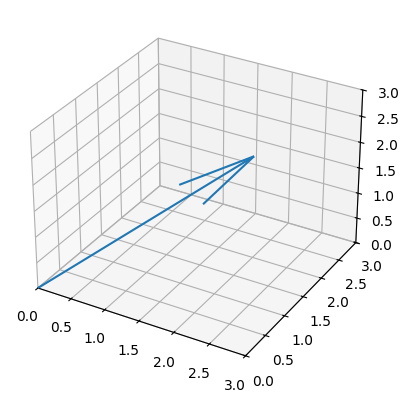

In [4]:
v = np.array([2,2,2])
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim([0,3])
ax.set_ylim([0,3])
ax.set_zlim([0,3])
ax.quiver(0,0,0, v[0],v[1],v[2], length=1)

In [6]:
print(np.array([1, 1]) * .5)
print(np.array([1, 1]) + np.array([1, 1]))
print(np.array([1, 1]) * np.array([.5, 2]))


[0.5 0.5]
[2 2]
[0.5 2. ]


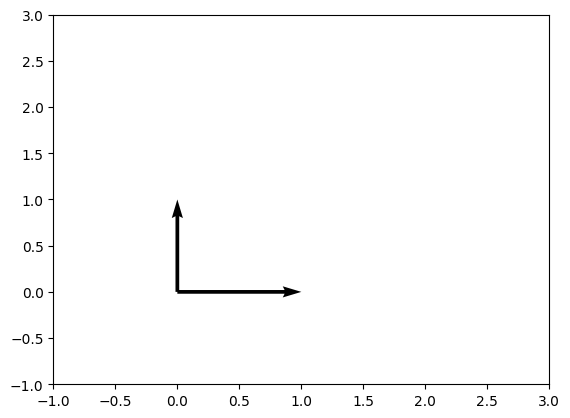

In [7]:
v1 = np.array([0,1])
v2 = np.array([1,0])

plt.xlim(-1,3)
plt.ylim(-1,3)

plt.quiver([0,0],[0,0],v1,v2,angles='xy',scale_units='xy',scale=1)

In [11]:
w = np.array([.7, .3, .1])
v = np.array([60, 35, 0])
b = 10
print(np.dot(w ,v) + b)

62.5


In [ ]:
X = np.array([[60, 35, 0], [52, 39, 0], [52, 35, 0]])
w = np.array([.7, .3, .1]) 
W = np.reshape(w, (3, 1))
b = np.array([10])
print(X @ W + b)
z = X @ w.T + b
print(z)


[[62.5]
 [58.1]
 [56.9]]
[62.5 58.1 56.9]
[62.5 58.1 56.9]


In [31]:
print(X)
ridge = X + .1 * np.eye(3)
print(ridge)
inverse = np.linalg.inv(ridge)
print(inverse)
v = ridge @ inverse
print(v)
print(np.allclose(v, np.eye(3)))


[[60 35  0]
 [52 39  0]
 [52 35  0]]
[[60.1 35.   0. ]
 [52.  39.1  0. ]
 [52.  35.   0.1]]
[[ 0.07378611 -0.06604895  0.        ]
 [-0.09812987  0.11341549  0.        ]
 [-4.02332472 -5.34996509 10.        ]]
[[1.00000000e+00 4.44089210e-16 0.00000000e+00]
 [0.00000000e+00 1.00000000e+00 0.00000000e+00]
 [1.66533454e-16 4.44089210e-16 1.00000000e+00]]
True


In [33]:
y = np.array([52, 52, 53])
X = ridge
w = np.linalg.inv(X.T @ X) @ X.T @ y
print(w)
print(X @ w)
print(y)

[ 0.40233247  0.79485196 42.5889302 ]
[52. 52. 53.]
[52 52 53]


In [25]:
import numpy as np
import pandas as pd

data = pd.read_csv('dataset/clean_weather.csv')
print(data.head())

   Unnamed: 0  tmax  tmin  rain  tmax_tomorrow
0  1970-01-01  60.0  35.0   0.0           52.0
1  1970-01-02  52.0  39.0   0.0           52.0
2  1970-01-03  52.0  35.0   0.0           53.0
3  1970-01-04  53.0  36.0   0.0           52.0
4  1970-01-05  52.0  35.0   0.0           50.0


In [26]:
data.isnull().sum()

Unnamed: 0         0
tmax              11
tmin              14
rain             281
tmax_tomorrow     11
dtype: int64

In [27]:
data.fillna({'tmax': data.tmax.median()}, inplace=True)
data.fillna({'tmin': data.tmin.median()}, inplace=True)
data.fillna({'rain': data.rain.median()}, inplace=True)
data.fillna({'tmax_tomorrow': data.tmax_tomorrow.median()}, inplace=True)

In [28]:
data.isnull().sum()

Unnamed: 0       0
tmax             0
tmin             0
rain             0
tmax_tomorrow    0
dtype: int64

In [29]:
from sklearn.preprocessing import StandardScaler
PRED = ["tmax", "tmin", "rain"]
TARGET = ["tmax_tomorrow"]

#scaler = StandardScaler()
#data[PRED] = scaler.fit_transform(data[PRED])

split = np.split(data, [int(len(data) * .7), int(len(data) *.85)])
(train_X, train_y), (valid_X, valid_y), (test_X, test_y) = [[d[PRED].to_numpy(), d[TARGET].to_numpy()] for d in split]
print(train_X.shape, train_y.shape, valid_X.shape, valid_y.shape, test_X.shape, test_y.shape)

(9456, 3) (9456, 1) (2026, 3) (2026, 1) (2027, 3) (2027, 1)


/home/joseph/Source/Sample/ML/Basics/venv/lib/python3.10/site-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [14]:
def init_params(predictors):
    params = []
    np.random.seed(0)
    params.append(np.random.rand(predictors, 1))
    params.append(np.ones((1,1)))
    return params

In [ ]:
def forward(X, params):
    weights = params[0]
    bias = params[1]
    
    return X @ weights + bias

def mse(actual, predicted):
    return np.mean((actual - predicted) ** 2)

def mse_gradient(actual, predicted):
    return predicted - actual

In [18]:
def backward(params, X, gradient, learning_rate):
    w_gradient = X.T / X.shape[0] @ gradient
    b_gradient = np.mean(gradient, axis=0)
    
    params[0] -= learning_rate * w_gradient
    params[1] -= learning_rate * b_gradient

    return params


In [30]:
learning_rate = 1e-5
epochs = 50000
params = init_params(train_X.shape[1])
print(params[0].shape, params[1].shape)
for i in range(epochs):
    
    gradient = mse_gradient(train_y, forward(train_X, params))
    params = backward(params, train_X, gradient, learning_rate)

    if(i % 1000 == 0):
        print(f"Epoch {i} loss : {mse(valid_y, forward(valid_X, params))}")


(3, 1) (1, 1)
Epoch 0 loss : 69.06195251131214
Epoch 1000 loss : 28.550518409792463
Epoch 2000 loss : 26.82828380994394
Epoch 3000 loss : 25.633804668972722
Epoch 4000 loss : 24.800651966575767
Epoch 5000 loss : 24.215782117048544
Epoch 6000 loss : 23.802243447982228
Epoch 7000 loss : 23.507515862355113
Epoch 8000 loss : 23.295643043106264
Epoch 9000 loss : 23.141919021200664
Epoch 10000 loss : 23.029296010763396
Epoch 11000 loss : 22.945952817532078
Epoch 12000 loss : 22.88364633502495
Epoch 13000 loss : 22.836591884640825
Epoch 14000 loss : 22.800701077695646
Epoch 15000 loss : 22.77306168554206
Epoch 16000 loss : 22.751581576441627
Epoch 17000 loss : 22.73474408353911
Epoch 18000 loss : 22.721439220394046
Epoch 19000 loss : 22.710846657819154
Epoch 20000 loss : 22.702354133335877
Epoch 21000 loss : 22.69550020336724
Epoch 22000 loss : 22.689933789857218
Epoch 23000 loss : 22.685385370229973
Epoch 24000 loss : 22.68164628471054
Epoch 25000 loss : 22.678553738718687
Epoch 26000 loss :